In [178]:
# example sine sweep duffing oscillator
# using ssd.dyn.CHNL
from SSDpy.dyn.EOMsolvers import CHNL
import numpy as np
import matplotlib.pyplot as plt

# define parameters
m = 1.0
k = 1.0
xi = 0.015
kNL= 0.001
c = 2 * xi * np.sqrt(k * m)

# define a handle to the nonlinear restoring force
def FNL(u, v, param):
    k = param['k']
    kNL = param['kNL']
    c = param['c']
    fInt = k * u + c * v + kNL * u**3
    K = k + 3 * kNL * u**2
    C = c
    return fInt, K, C 

def fExt(t, param):
    return np.sin(instPhase(t, param)[0])

def instPhase(t, param):
    omega0 = param['omega0']
    omegaDot = param['omegaDot']
    omegaNat = np.sqrt(param['k'] / param['M'])
    omegaMax = 1.5 * omegaNat # reverse sweep past this frequency
    phase = omega0 * t + 0.5 * omegaDot * t ** 2
    instFreq = omega0 + omegaDot * t
    if instFreq < 1.5 * omegaNat:
        return phase, instFreq
    else:
        return 2 * omegaMax * t - phase, 2 * omegaMax - instFreq
    

# Set Chung-Hulbert parameters
n = 50000
T = 20000
aTol = 1e-6
iterMax = 100
param = {'rhoInf': 0.95, 'num': [n, T, aTol, iterMax]}

param['M'] = np.array(m)
param['k'] = np.array(k)
param['kNL'] = np.array(kNL)
param['c'] = np.array(c)
param['omega0'] = 0.4
param['omegaDot'] = 0.0001
param['IC'] = np.array([0.0, 0.0])
param['fExt'] = lambda t, param: fExt(t, param)
param['fInt'] = lambda u, v, param: FNL(u, v, param)
sol = CHNL(param)

In [179]:
# use Hilbert transform to get envelope of displacement
from scipy.signal import hilbert
u = sol['disp'][0,:]
u[1]=u[0]
hilbert(u)
uHilb = np.abs(hilbert(u))


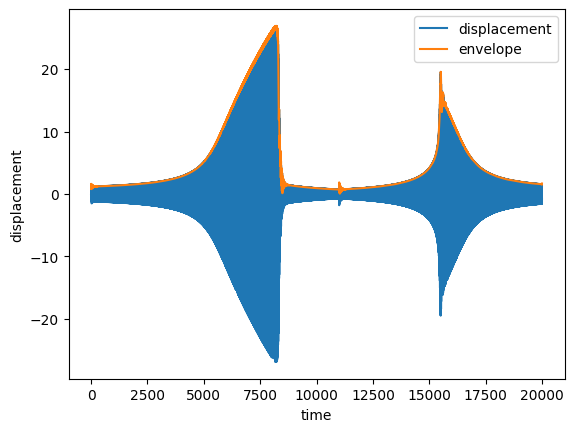

In [180]:
plt.figure()
plt.plot(sol['time'], u, label='displacement')
plt.plot(sol['time'], uHilb, label='envelope')
plt.xlabel('time')
plt.ylabel('displacement')
plt.legend()

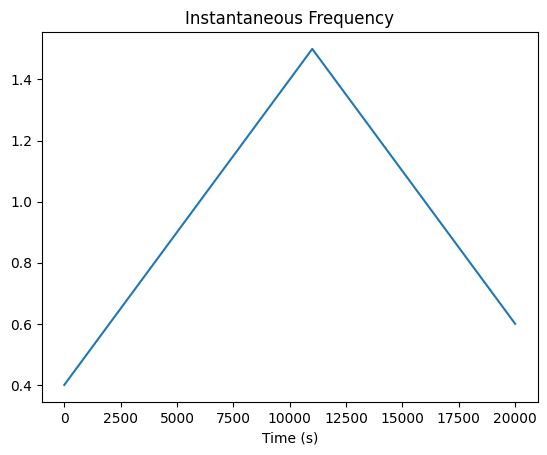

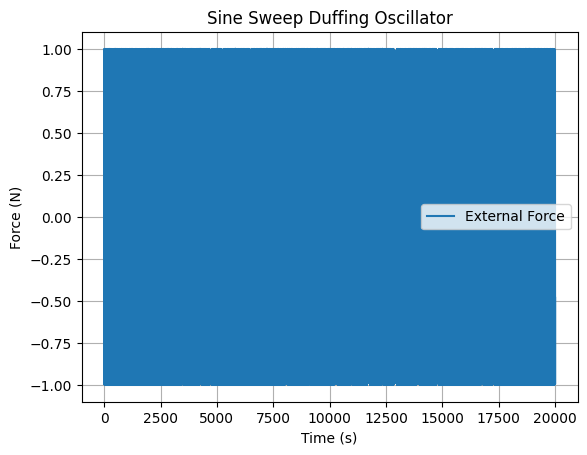

In [ ]:
# plot instantaneous frequency
plt.figure()
instFreq = []
fext = []
for t in sol['time']:
    phase, freq = instPhase(t, param)
    instFreq.append(freq)
    fext.append(fExt(t, param))
plt.plot(sol['time'], instFreq, label='Instantaneous Frequency')
plt.xlabel('Time (s)')
plt.title('Instantaneous Frequency [rad/s]')

plt.figure()
plt.plot(sol['time'], fext, label='External Force')
plt.xlabel('Time (s)')
plt.ylabel('Force (N)')
plt.title('Sine Sweep Duffing Oscillator')
plt.legend()
plt.grid()

<Figure size 640x480 with 0 Axes>

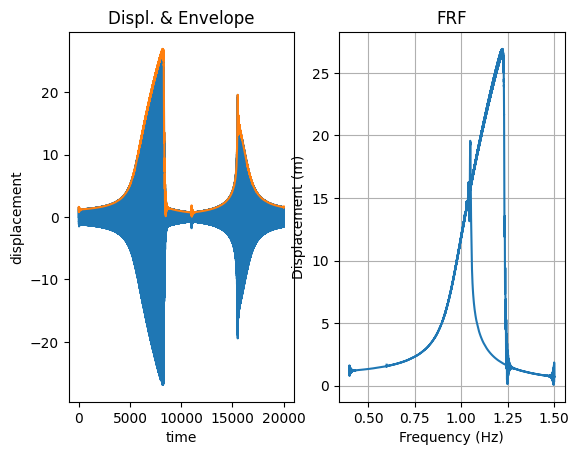

In [187]:
# plot envelope vs instantaneous frequency
plt.figure()
plt.figure()
plt.subplot(1, 2, 1)
plt.plot(sol['time'], u, label='displacement')
plt.plot(sol['time'], uHilb, label='envelope')
plt.xlabel('time')
plt.ylabel('displacement')
plt.title('Displ. & Envelope')
plt.subplot(1, 2, 2)
plt.plot(instFreq, uHilb)
plt.ylabel('Displacement (m)')
plt.xlabel('Frequency (Hz)')
plt.title('FRF')
plt.grid()


in the previous plot we see that the ramp up follows the upper branch of the FRF while the ramp down follows the lower branch. There is an unstable branch in between that can't be observed experimentally without additional control.
Small glitches correspond to numerical artifact. 